In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import seaborn as sns

In [134]:
votes = np.genfromtxt('MDA3_data/votes.txt')
av_vote = np.mean(votes,axis = 0)

In [120]:
# [np.unique(votes[:,i], return_counts = True)for i in range(9)]

In [4]:
counts = np.array([np.unique(votes[:,i], return_counts = True)[1]/len(votes) for i in range(9)])

In [121]:
# counts

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9')]

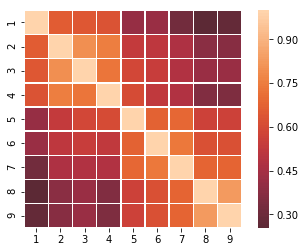

In [6]:
heatmap = sns.heatmap(np.corrcoef(votes.T), linewidth=0.5, square=True, center = 0)
heatmap.set_xticklabels(labels = range(1,10)) 
heatmap.set_yticklabels(labels = range(1,10)) 

In [7]:
all9 = np.empty((512,9))
for j, w in enumerate(itertools.product([0,1], repeat=9)):
    all9[j] = w

In [8]:
def word_prob(word, p_x):
    p = 1
    for n, letter in enumerate(word):    
        p = p * p_x[n, int(letter)]  
    return p

In [9]:
P_word = np.empty(512)
for i,word in enumerate(all9):
    P_word[i] = word_prob(word, counts)

In [10]:
judge_mean = np.zeros(9)
for i, word in enumerate(all9):
    for j in range(9):
        if word[j] == 1:
            judge_mean[j] += P_word[i]

In [11]:
judge_mean
# array([0.33407821, 0.41452514, 0.41899441, 0.45027933, 0.60558659,
#        0.61340782, 0.68826816, 0.7027933 , 0.72513966])

array([0.33407821, 0.41452514, 0.41899441, 0.45027933, 0.60558659,
       0.61340782, 0.68826816, 0.7027933 , 0.72513966])

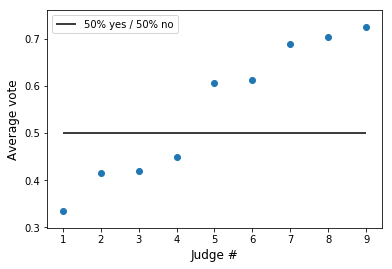

In [12]:
plt.scatter(range(1,10),judge_mean)
plt.xticks(range(1,10))
plt.xlabel('Judge #', fontsize = 12)
plt.ylabel('Average vote', fontsize = 12)
plt.hlines(0.5, 1, 9, label = '50% yes / 50% no')
plt.legend()

Text(0.5, 0, 'Real mean')

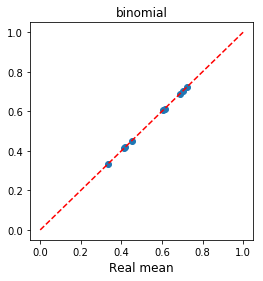

In [146]:
plt.figure(figsize = (4,4))
plt.scatter(av_vote,judge_mean)
plt.title('binomial')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls = '--', c = 'red')
plt.xlabel('Real mean', fontsize = 12)

In [15]:
w_cent_1 = np.array(all9 - judge_mean, copy = True)
cov_1 = (P_word * w_cent_1.T) @ w_cent_1
sigma_1 = np.sqrt(np.sum(w_cent_1.T * w_cent_1.T * P_word, 1)) 
cor_1 = cov_1 / np.outer(sigma_1, sigma_1)

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9')]

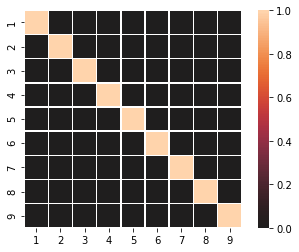

In [122]:
heatmap = sns.heatmap(cor_1, linewidth=0.5, square=True, center = 0)
heatmap.set_xticklabels(labels = range(1,10)) 
heatmap.set_yticklabels(labels = range(1,10)) 

### Version 1:  Correlated judges distribution 

In [60]:
# def word_sum_prob(word, p_x):
#     p = 0
#     for n, letter in enumerate(word):    
#         p += p_x[n, int(letter)]  
#     return p

In [61]:
# P_corr = np.empty(512)
# for i, word in enumerate(all9):
#     P_corr[i] = P_word[i]*word_sum_prob(word, counts)
# P_corr = P_corr/sum(P_corr)

In [62]:
# corr_mean = np.zeros(9)
# for i, word in enumerate(all9):
#     for j in range(9):
#         if word[j] == 1:
#             corr_mean[j] += P_corr[i]

In [63]:
# plt.scatter(range(1,10),corr_mean, label = 'correlated distr',  marker = '.')
# plt.scatter(range(1,10),judge_mean, label = 'ind binomial judges',  marker ='s')
# plt.scatter(range(1,10),av_vote, marker = 'x',label =  'average', c = 'black')
# plt.xticks(range(1,10))
# plt.xlabel('Judge #', fontsize = 12)
# plt.ylabel('Average vote', fontsize = 12)
# plt.hlines(0.5, 1, 9, label = '50% yes / 50% no', color = 'red')
# plt.legend()

In [64]:
# corr_mean

In [65]:
# corr_corrs = np.empty((9,9))
# for i in range(9):
#     for j in range(9):
#         top = sum((votes[:,i] - judge_mean[i])*(votes[:,j] - judge_mean[j]))
#         bot1 = np.sqrt(sum((votes[:,i] - judge_mean[i])**2))
#         bot2 = np.sqrt(sum((votes[:,j] - judge_mean[j])**2))
#         corr_corrs[i][j] = top/(bot1 * bot2)

In [66]:
# heatmap = sns.heatmap(corr_corrs, linewidth=0.5, square=True, center = 0)
# heatmap.set_xticklabels(labels = range(1,10)) 
# heatmap.set_yticklabels(labels = range(1,10)) 

### Version 2: correlated distribution

In [21]:
i = 0
Pij = np.empty((2,9,2,9))
for i in range(9):
    select1 = np.where(votes[:,i] == 1)[0]
    Pij[1][i][1] = np.sum(votes[select1], axis = 0)/len(select1)
    Pij[1][i][0] = 1-Pij[1][i][1]
    select0 = np.where(votes[:,i] == 0)[0]
    Pij[0][i][1] = np.sum(votes[select0], axis = 0)/len(select0)
    Pij[0][i][0] = 1-Pij[0][i][1]

In [22]:
def word_sum_prob2(word, Pij, P_x):
    p = 0
    for i, letter in enumerate(word):
        p_i = P_x[i, int(letter)]
        curr_P_ij = 1
        for j, other_letter in enumerate(word):
            #if j == i: continue
            curr_P_ij = curr_P_ij* Pij[int(letter), i, int(other_letter), j]  
        p+= p_i * curr_P_ij
    return p

In [23]:
P_corr_2 = np.empty(512)
for i, word in enumerate(all9):
    P_corr_2[i] = word_sum_prob2(word, Pij, counts)
P_corr_2 = P_corr_2/sum(P_corr_2)

In [24]:
corr_mean_2 = np.zeros(9)
for i, word in enumerate(all9):
    for j in range(9):
        if word[j] == 1:
            corr_mean_2[j] += P_corr_2[i]
# or just one line: np.sum(all9.T * P_corr_2, 1)

In [25]:
corr_mean_2

array([0.33407821, 0.41452514, 0.41899441, 0.45027933, 0.60558659,
       0.61340782, 0.68826816, 0.7027933 , 0.72513966])

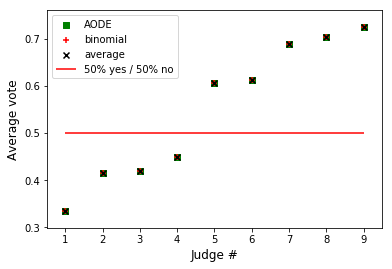

In [152]:
plt.scatter(range(1,10),corr_mean_2, label = 'AODE',  marker = 's', c = 'green')
plt.scatter(range(1,10),judge_mean, label = 'binomial',  marker ='+', c = 'red')
plt.scatter(range(1,10),av_vote, marker = 'x',label =  'average', c = 'black')
plt.xticks(range(1,10))
plt.xlabel('Judge #', fontsize = 12)
plt.ylabel('Average vote', fontsize = 12)
plt.hlines(0.5, 1, 9, label = '50% yes / 50% no', color = 'red')
plt.legend()

Text(0.5, 0, 'Real mean')

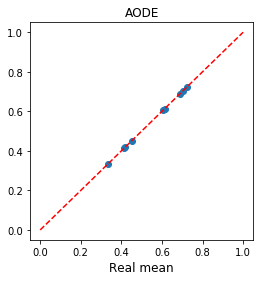

In [148]:
plt.figure(figsize = (4,4))
plt.scatter(av_vote,corr_mean_2)
plt.title('AODE')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls = '--', c = 'red')
plt.xlabel('Real mean', fontsize = 12)

In [29]:
w_cent_2 = np.array(all9 - corr_mean_2, copy = True)
cov_2 = (P_corr_2 * w_cent_2.T) @ w_cent_2
sigma_2 = np.sqrt(np.sum(w_cent_2.T * w_cent_2.T * P_corr_2, 1)) 
cor_2 = cov_2 / np.outer(sigma_2, sigma_2)

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9')]

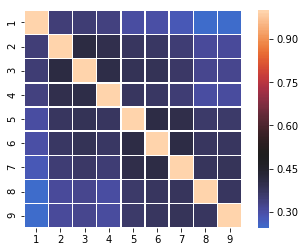

In [30]:
heatmap = sns.heatmap(cor_2, linewidth=0.5, square=True, center = 0.5)
heatmap.set_xticklabels(labels = range(1,10)) 
heatmap.set_yticklabels(labels = range(1,10)) 

(0, 1)

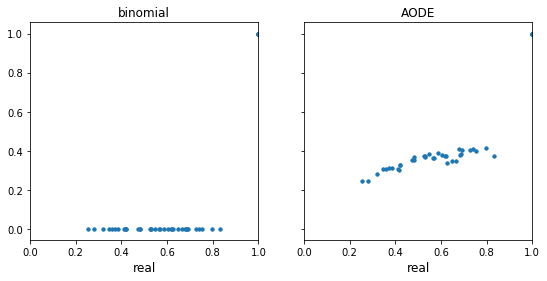

In [156]:
fig, ax = plt.subplots(1,2,figsize = (9,4), sharey = True)
ax[1].scatter(np.corrcoef(votes.T), cor_2, marker = '.')
ax[1].set_title('AODE')
ax[0].scatter(np.corrcoef(votes.T), cor_1, marker = '.')
ax[0].set_title('binomial')
ax[0].set_xlabel('real', fontsize = 12)
ax[1].set_xlabel('real', fontsize = 12)
ax[1].set_xlim(0,1)
ax[0].set_xlim(0,1)

### Moments

In [33]:
var_model1 = np.zeros(9)
var_model2 = np.zeros(9)
for i in range(9):
    sel_1 = np.where(all9[:,i] == 1)[0]
    sel_0 = np.where(all9[:,i] == 0)[0]
    var_model1[i] = sum(P_word[sel_1])*(1-judge_mean[i])**2 + sum(P_word[sel_0])*(0-judge_mean[i])**2
    var_model2[i] = sum(P_corr_2[sel_1])*(1-corr_mean_2[i])**2 + sum(P_corr_2[sel_0])*(0-corr_mean_2[i])**2
    

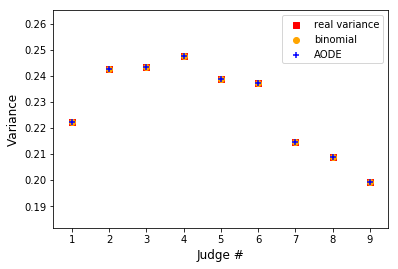

In [167]:
plt.figure(figsize = (6,4))
plt.scatter(range(1,10),np.std(votes, 0)**2, label = 'real variance', c = 'red', marker = 's')
plt.scatter(range(1,10),var_model1, label = 'binomial', c = 'orange')
plt.scatter(range(1,10),var_model2, label = 'AODE', marker = '+', c = 'blue')
#plt.scatter(range(1,10),sigma_1**2, label = 'ind binomial #2', marker = '+')
plt.ylabel('Variance', fontsize = 12)
plt.xlabel("Judge #", fontsize = 12)
plt.legend()

### Prediction

In [61]:
train = votes[:800,:]
test = votes[800:,:]

In [62]:
counts_train = np.array([np.unique(train[:,i], return_counts = True)[1]/len(train) for i in range(9)])

In [63]:
i = 0
Pij_train = np.empty((2,9,2,9))
for i in range(9):
    select_train1 = np.where(train[:,i] == 1)[0]
    Pij_train[1][i][1] = np.sum(train[select_train1], axis = 0)/len(select_train1)
    Pij_train[1][i][0] = 1-Pij_train[1][i][1]
    select_train0 = np.where(train[:,i] == 0)[0]
    Pij_train[0][i][1] = np.sum(train[select_train0], axis = 0)/len(select_train0)
    Pij_train[0][i][0] = 1-Pij_train[0][i][1]

In [170]:
P_train = np.empty(512)
P_train_0 = np.empty(512)
for i, word in enumerate(all9):
    P_train[i] = word_sum_prob2(word, Pij_train, counts_train)
    P_train_0[i] = word_prob(word, counts_train)
P_train = P_train/sum(P_train)
P_train_0 = P_train_0/sum(P_train_0)

In [168]:
Pij_train.flatten().shape

(324,)

#### Likelihood

In [94]:
index = []
for i, word in enumerate(all9):
    for j, word1 in enumerate(test):
        if tuple(word) == tuple(word1):
            if i in index: continue
            else: index.append(i)

In [174]:
likelihood = np.sum(np.log(P_train[index]))
likelihood_0 = np.sum(np.log(P_train_0[index]))

In [177]:
likelihood_0

-205.0085257546014